
# Project: Car_Price_Prediction
This project involves analyzing a dataset of car specifications using various statistical and machine learning techniques. to predict the price of used cars using statistical and machine learning techniques.

### Objectives:

- Data Exploration: Understand the dataset's structure and distribution.
- Data Visualization: Identify patterns and relationships among car features.
- Model Development: Build a regression model to predict car prices.
- Model Evaluation: Assess the model's performance using appropriate metrics.


# Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [11]:
# Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Create a dataframe named "data" from the given datafile and print it's head

# Create a dataframe named "data" from the given datafile and print it's head

In [12]:
data=pd.read_csv(r"D:\FileHistory\Downloads\cars.csv",header=0)

In [13]:
data.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [14]:
data.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

# Performing Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [15]:
data.describe(include='all')

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,100.000000,100,100,100.00000,100.000000,100,100,100,100.000000,100.000000,100.000000,100.000000,1.000000e+02
unique,NaN,11,58,NaN,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Ford,Mustang,NaN,NaN,Petrol,Automatic,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,11,3,NaN,NaN,52,57,44,NaN,NaN,NaN,NaN,NaN
mean,50.500000,NaN,NaN,2018.39000,28150.000000,NaN,NaN,NaN,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,NaN,NaN,1.17116,9121.375716,NaN,NaN,NaN,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,NaN,NaN,2016.00000,10000.000000,NaN,NaN,NaN,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,NaN,NaN,2017.75000,22000.000000,NaN,NaN,NaN,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,NaN,NaN,2018.00000,27000.000000,NaN,NaN,NaN,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,NaN,NaN,2019.00000,32000.000000,NaN,NaN,NaN,19.000000,2143.000000,187.000000,5.000000,2.500000e+06


In [16]:
data.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [18]:
print(data.describe())
print(data.shape)

           Car_ID        Year  Kilometers_Driven     Mileage       Engine  \
count  100.000000   100.00000         100.000000  100.000000   100.000000   
mean    50.500000  2018.39000       28150.000000   17.210000  1855.230000   
std     29.011492     1.17116        9121.375716    3.309902   631.311475   
min      1.000000  2016.00000       10000.000000   10.000000   999.000000   
25%     25.750000  2017.75000       22000.000000   15.000000  1462.000000   
50%     50.500000  2018.00000       27000.000000   17.000000  1774.000000   
75%     75.250000  2019.00000       32000.000000   19.000000  2143.000000   
max    100.000000  2021.00000       60000.000000   25.000000  4951.000000   

            Power       Seats         Price  
count  100.000000  100.000000  1.000000e+02  
mean   158.130000    5.230000  1.574000e+06  
std     76.968137    0.750151  1.000265e+06  
min     68.000000    4.000000  4.500000e+05  
25%    103.000000    5.000000  7.000000e+05  
50%    148.000000    5.000000 

# Outliers Detection using Box Plot

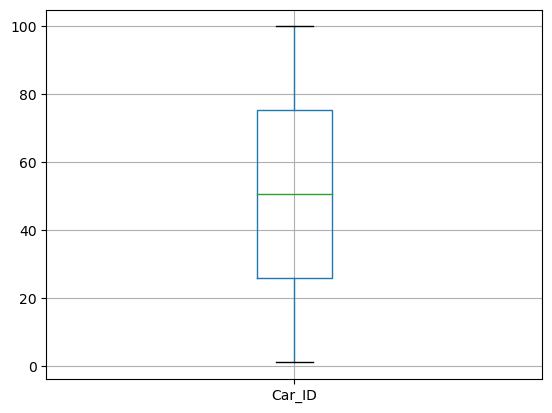

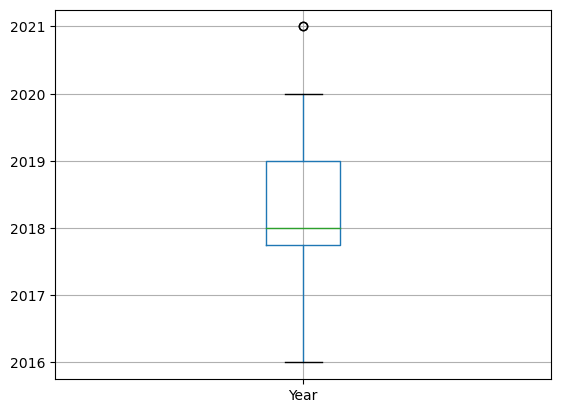

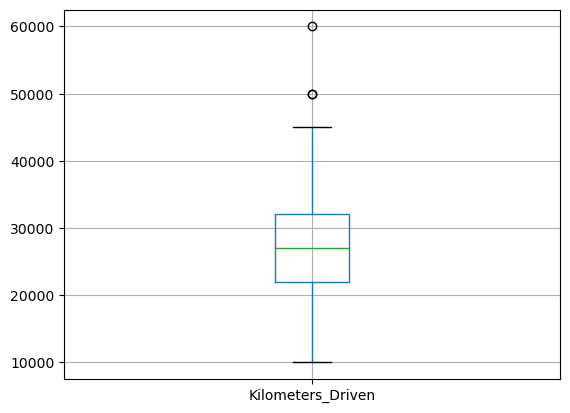

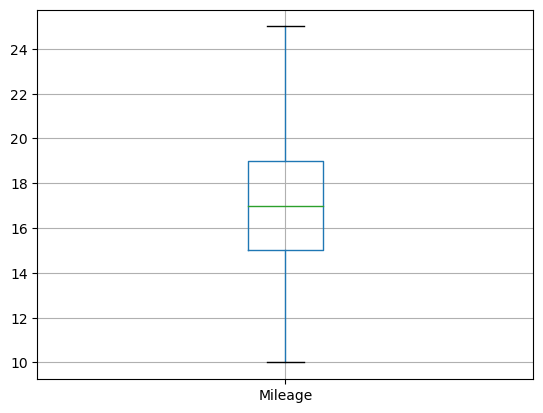

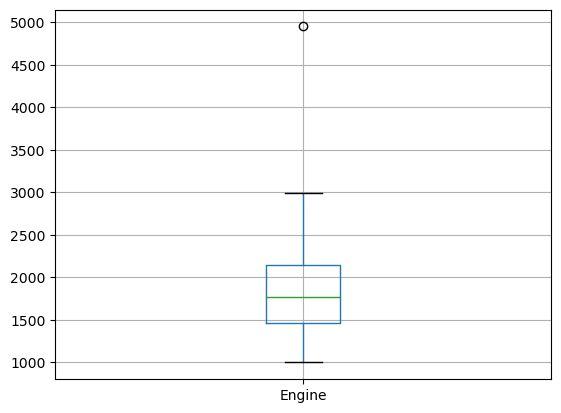

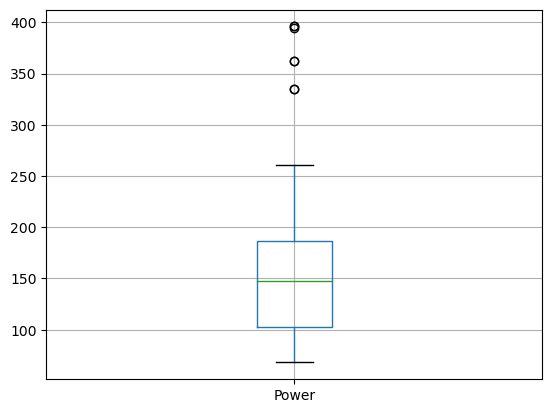

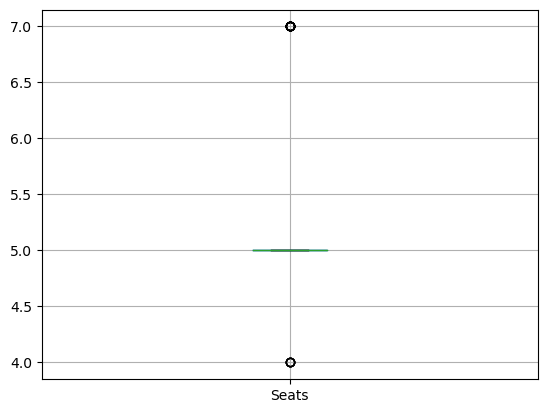

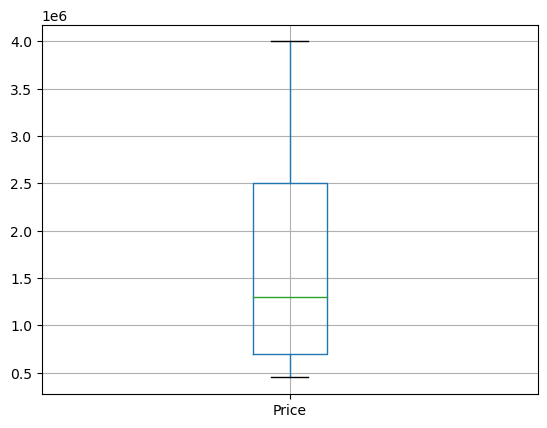

In [19]:
for i in data.columns:
    if data[i].dtype=='int64' or data[i].dtype=='float64':
       data.boxplot(column=i)
       plt.show()


# Checking Unique value in each column

In [20]:
for i in data.columns:
    print({i:data[i].unique()})

{'Car_ID': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)}
{'Brand': array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)}
{'Model': array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar',

# dropping insignificant variables

In [21]:
data.drop(["Car_ID"],axis=1,inplace=True)

# Converting Categorical values into Numerical

In [22]:
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in ['Model']:
    data[x]=le.fit_transform(data[x])

In [23]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Feature', x)
print('mapping', le_name_mapping)

Feature Model
mapping {'3 Series': 0, '5 Series': 1, '7 Series': 2, 'A3': 3, 'A4': 4, 'A5': 5, 'A6': 6, 'Altroz': 7, 'Ameo': 8, 'Aspire': 9, 'BR-V': 10, 'C-Class': 11, 'Camry': 12, 'City': 13, 'Civic': 14, 'Corolla': 15, 'Creta': 16, 'E-Class': 17, 'EcoSport': 18, 'Elantra': 19, 'Endeavour': 20, 'Ertiga': 21, 'Figo': 22, 'Fortuner': 23, 'GLA': 24, 'GLC': 25, 'GLE': 26, 'Harrier': 27, 'Innova': 28, 'Innova Crysta': 29, 'Mustang': 30, 'Nexon': 31, 'Passat': 32, 'Polo': 33, 'Q3': 34, 'Q7': 35, 'Ranger': 36, 'S-Cross': 37, 'Safari': 38, 'Santro': 39, 'Scorpio': 40, 'Sonata': 41, 'Swift': 42, 'T-Roc': 43, 'Thar': 44, 'Tiago': 45, 'Tigor': 46, 'Tiguan': 47, 'Vento': 48, 'Venue': 49, 'Verna': 50, 'Vitara': 51, 'WR-V': 52, 'X1': 53, 'X3': 54, 'X5': 55, 'XUV300': 56, 'Yaris': 57}


In [24]:
data.Fuel_Type.replace({"Petrol":0,"Diesel":1}, inplace=True)
data.Transmission.replace({"Manual":0,"Automatic":1}, inplace=True)
data.Owner_Type.replace({"First":1, "Second":2, "Third":3}, inplace=True)
data.Brand.replace({'Toyota':1, 'Honda':2, 'Ford':3, 'Maruti':4, 'Hyundai':5, 'Tata':6, 'Mahindra':7,
       'Volkswagen':8, 'Audi':9, 'BMW':10, 'Mercedes':11},inplace=True)
data.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,15,2018,50000,0,0,1,15,1498,108,5,800000
1,2,14,2019,40000,0,1,2,17,1597,140,5,1000000
2,3,30,2017,20000,0,1,1,10,4951,395,4,2500000
3,4,42,2020,30000,1,0,3,23,1248,74,5,600000
4,5,41,2016,60000,1,1,2,18,1999,194,5,850000


# Checking Assumptions of Linear Regression

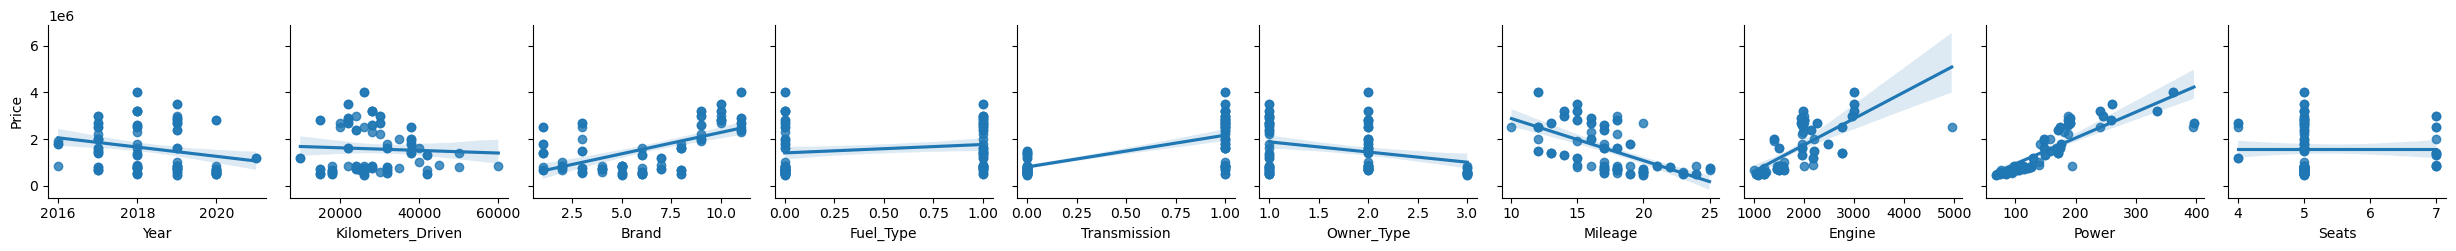

In [25]:
sns.pairplot(data,x_vars=['Year','Kilometers_Driven','Brand','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats'],
            y_vars=['Price'],kind='reg')
plt.show()

# Creating or spliting data into X and Y

In [26]:
#CReate X and y
X=data.iloc[:,0:-1]
Y=data.iloc[:,-1]
X1=data.iloc[:,0:-1]
Y1=data.iloc[:,-1]

In [27]:
X.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,1,15,2018,50000,0,0,1,15,1498,108,5
1,2,14,2019,40000,0,1,2,17,1597,140,5
2,3,30,2017,20000,0,1,1,10,4951,395,4
3,4,42,2020,30000,1,0,3,23,1248,74,5
4,5,41,2016,60000,1,1,2,18,1999,194,5


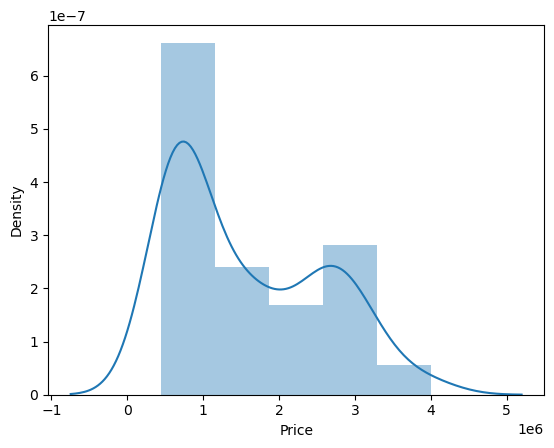

In [28]:
#Check for Assumption 3-Assumption of Normality
sns.distplot(Y)
plt.show()

In [29]:
#Y_log=np.log(Y)
#Y_log

In [30]:
#sns.distplot(Y_log)
#plt.show()

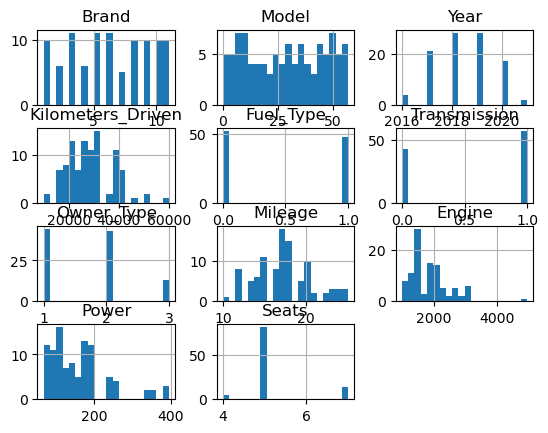

In [31]:
#normality 
X.hist(bins=20)
plt.show()

In [32]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np

Brand               -0.062852
Model               -0.016999
Year                 0.001225
Kilometers_Driven    0.611903
Fuel_Type            0.080064
Transmission        -0.282785
Owner_Type           0.492032
Mileage              0.366971
Engine               1.529325
Power                1.411690
Seats                1.619554
dtype: float64
Engine    1.529325
Power     1.411690
Seats     1.619554
dtype: float64


                      Brand     Model      Year  Kilometers_Driven  Fuel_Type  \
Brand              1.000000 -0.133299  0.043337          -0.256078   0.080113   
Model             -0.133299  1.000000  0.090754           0.011237   0.059048   
Year               0.043337  0.090754  1.000000          -0.741176  -0.252843   
Kilometers_Driven -0.256078  0.011237 -0.741176           1.000000   0.323762   
Fuel_Type          0.080113  0.059048 -0.252843           0.323762   1.000000   
Transmission       0.520756 -0.263721 -0.211993          -0.030157   0.066306   
Owner_Type        -0.183280  0.088050 -0.036276          -0.000560  -0.323325   
Mileage           -0.155856  0.130721  0.213177          -0.104437   0.060292   
Engine             0.126469 -0.074587 -0.355122           0.112340   0.258043   
Power              0.350248 -0.153203 -0.249446          -0.026732   0.008562   
Seats             -0.244869 -0.063274 -0.252598           0.396443   0.347549   

                   Transmis

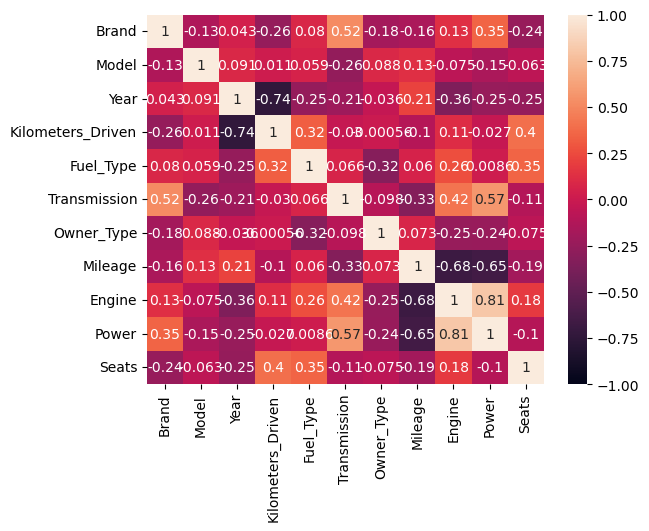

In [33]:
corr_df=X.corr(method='pearson')
print(corr_df)
sns.heatmap(corr_df,vmax=1.0,vmin=-1,annot=True)
plt.show()

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)
#vif factor is not greather 5 or 10

,features,VIF Factor
0,Brand,8.38
1,Model,4.23
2,Year,301.10
3,Kilometers_Driven,14.58
4,Fuel_Type,3.55
5,Transmission,4.54
6,Owner_Type,8.78
7,Mileage,69.14
8,Engine,49.07
9,Power,26.86


# Scaling the Data

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)  
X = scaler.transform(X)

In [36]:
from sklearn.model_selection import train_test_split
#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [37]:
from sklearn.model_selection import train_test_split
#split the data into test and train
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=10)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80, 11)
(20, 11)
(80,)
(20,)


# Model Build

### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()
#train the model object
lm.fit(X_train,Y_train)
#print the interpretateand coefffient 
print(lm.intercept_)
print(lm.coef_)

1578281.966772401
[ 252311.49608916  -85691.38446452 -124625.05762368 -154660.11966284
   51387.66686211  113756.56409417  -82574.92319054  -75801.18774634
  265086.46472886  434770.94183431   37688.94348596]


In [40]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[2813207.6875526   919590.49398854  923319.96184727 3392657.25524423
 2614246.81278747   26035.4331075   158665.36842484  158665.36842484
 3812368.2443387   342644.31590299 4498460.31578754  850406.2549064
  985963.88044848  895341.06016656 2566398.28662795 1688321.58973516
 1043180.76209996 2656438.1048826   732203.28801161 3250082.19295591]


# Evaluate

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7995093486299287
RMSE: 527566.2370719124
Adj R-square: 0.7744480172086698


# Comparing and Evaluating the Acutal and predicted values

In [42]:
new = pd.DataFrame(Y1_test)

In [43]:
new

,Price
19,2500000
14,850000
43,700000
37,3500000
66,2700000
3,600000
79,450000
41,450000
38,4000000
68,600000


In [44]:
new_df=pd.DataFrame()
new_df=X1_test.copy()
new_df['Actual_charges']=new

In [45]:
new_df.shape

(20, 12)

In [46]:
new_df.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Actual_charges
19,11,25,2017,26000,0,1,2,12,1991,241,5,2500000
14,4,21,2020,18000,0,0,1,19,1462,103,7,850000
43,4,37,2020,15000,0,1,2,18,1462,103,5,700000
37,10,2,2019,22000,1,1,1,15,2993,261,5,3500000
66,11,17,2017,30000,1,1,1,16,1950,191,5,2700000


In [47]:
new_df.shape

(20, 12)

In [48]:
Y_pred.shape

(20,)

In [49]:
new_df['Predicted_charges']=Y_pred
new_df=new_df.reset_index().drop('index',axis=1)

In [50]:
new_df['Predicted_charges'] = pd.to_numeric(new_df['Predicted_charges'], errors='coerce')

In [51]:
new_df

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Actual_charges,Predicted_charges
0,11,25,2017,26000,0,1,2,12,1991,241,5,2500000,2.813208e+06
1,4,21,2020,18000,0,0,1,19,1462,103,7,850000,9.195905e+05
2,4,37,2020,15000,0,1,2,18,1462,103,5,700000,9.233200e+05
3,10,2,2019,22000,1,1,1,15,2993,261,5,3500000,3.392657e+06
4,11,17,2017,30000,1,1,1,16,1950,191,5,2700000,2.614247e+06
5,4,42,2020,30000,1,0,3,23,1248,74,5,600000,2.603543e+04
6,5,39,2019,26000,0,0,3,20,1086,68,5,450000,1.586654e+05
7,5,39,2019,26000,0,0,3,20,1086,68,5,450000,1.586654e+05
8,11,26,2018,26000,0,1,2,12,2996,362,5,4000000,3.812368e+06
9,3,9,2019,26000,0,0,3,20,1194,94,5,600000,3.426443e+05


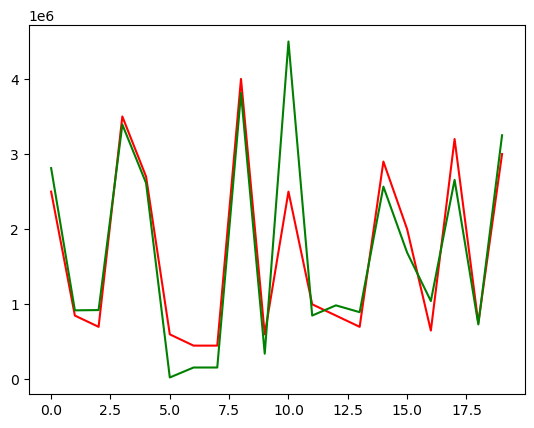

In [52]:
new_df['Actual_charges'].plot(color='red')
new_df['Predicted_charges'].plot(color='green')
plt.show()

In [53]:
lm.score(X_train,Y_train)

0.8923996537895806

In [54]:
lm.score(X_test,Y_test)

0.7995093486299287

In [55]:
print(Y_test.min())
print(Y_test.max())

450000
4000000


In [56]:
new_df

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Actual_charges,Predicted_charges
0,11,25,2017,26000,0,1,2,12,1991,241,5,2500000,2.813208e+06
1,4,21,2020,18000,0,0,1,19,1462,103,7,850000,9.195905e+05
2,4,37,2020,15000,0,1,2,18,1462,103,5,700000,9.233200e+05
3,10,2,2019,22000,1,1,1,15,2993,261,5,3500000,3.392657e+06
4,11,17,2017,30000,1,1,1,16,1950,191,5,2700000,2.614247e+06
5,4,42,2020,30000,1,0,3,23,1248,74,5,600000,2.603543e+04
6,5,39,2019,26000,0,0,3,20,1086,68,5,450000,1.586654e+05
7,5,39,2019,26000,0,0,3,20,1086,68,5,450000,1.586654e+05
8,11,26,2018,26000,0,1,2,12,2996,362,5,4000000,3.812368e+06
9,3,9,2019,26000,0,0,3,20,1194,94,5,600000,3.426443e+05


In [57]:
new_df['Residual']=new_df['Actual_charges']-new_df['Predicted_charges']
#new_df.to_excel('Price Prediction.xlsx',header=True,index=True)
new_df.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Actual_charges,Predicted_charges,Residual
0,11,25,2017,26000,0,1,2,12,1991,241,5,2500000,2.813208e+06,-313207.687553
1,4,21,2020,18000,0,0,1,19,1462,103,7,850000,9.195905e+05,-69590.493989
2,4,37,2020,15000,0,1,2,18,1462,103,5,700000,9.233200e+05,-223319.961847
3,10,2,2019,22000,1,1,1,15,2993,261,5,3500000,3.392657e+06,107342.744756
4,11,17,2017,30000,1,1,1,16,1950,191,5,2700000,2.614247e+06,85753.187213


# Ridge

In [58]:
from sklearn.linear_model import Ridge
rid=Ridge()
rid.fit(X_train,Y_train)

print(rid.intercept_)
print(rid.coef_)

1577820.799236123
[ 248911.85303967  -85380.49102311 -118446.84862046 -148067.13773613
   51314.99494941  119200.76452932  -82667.09510661  -79605.59431652
  266251.94111617  424363.46655004   33706.38675767]


In [59]:
Y_pred=rid.predict(X_test)

In [60]:
print(Y_pred)

[2799584.20373397  911582.33374927  936109.46897358 3383045.46125196
 2605471.91355776   36303.49453189  163734.68384544  163734.68384544
 3789485.49209767  345967.63392555 4481415.89104126  874145.25696169
  999021.24856634  892953.52712941 2562307.72634959 1692058.24583394
 1037615.41981878 2648009.36732967  729589.76258227 3229944.10848782]


In [61]:
#ridge
Y_pred=rid.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8025974146186391
RMSE: 523487.5395757188
Adj R-square: 0.777922091445969


### Hyperparameter tuning of the linear regression model using Ridge regularization resulted in improved performance metrics, specifically a higher R-squared and lower RMSE.

### To facilitate a comparative analysis of actual and predicted values, the predicted charges are integrated as a new column within the original DataFrame.

In [62]:
new_df=pd.DataFrame()
new_df=X1_test.copy()
new_df['Actual_charges']=Y1_test
new_df['Predicted_charges']=Y_pred
new_df=new_df.reset_index().drop('index',axis=1)
new_df['Predicted_charges'] = pd.to_numeric(new_df['Predicted_charges'], errors='coerce')
new_df

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Actual_charges,Predicted_charges
0,11,25,2017,26000,0,1,2,12,1991,241,5,2500000,2.799584e+06
1,4,21,2020,18000,0,0,1,19,1462,103,7,850000,9.115823e+05
2,4,37,2020,15000,0,1,2,18,1462,103,5,700000,9.361095e+05
3,10,2,2019,22000,1,1,1,15,2993,261,5,3500000,3.383045e+06
4,11,17,2017,30000,1,1,1,16,1950,191,5,2700000,2.605472e+06
5,4,42,2020,30000,1,0,3,23,1248,74,5,600000,3.630349e+04
6,5,39,2019,26000,0,0,3,20,1086,68,5,450000,1.637347e+05
7,5,39,2019,26000,0,0,3,20,1086,68,5,450000,1.637347e+05
8,11,26,2018,26000,0,1,2,12,2996,362,5,4000000,3.789485e+06
9,3,9,2019,26000,0,0,3,20,1194,94,5,600000,3.459676e+05


### The final model predictions on the test data are saved in Excel format for external accessibility.

In [63]:
new_df.to_excel('Price Prediction.xlsx',header=True,index=True)

# Lasso

In [64]:
from sklearn.linear_model import Lasso
las=Lasso()
las.fit(X_train,Y_train)
#print intersept ad coeffient 
print(las.intercept_)
print(las.coef_)

1578281.9575628003
[ 252311.30012198  -85691.38972633 -124618.80701403 -154653.54629631
   51386.75119475  113756.62328978  -82572.88730786  -75799.13438018
  265088.67452389  434770.84612813   37687.19121821]


In [65]:
Y_pred=las.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7995113781764212
RMSE: 527563.566815448
Adj R-square: 0.7744503004484737



# Summary of Insights
- **Data Exploration**: The dataset shows that certain variables, such as horsepower and weight, are strongly correlated with fuel efficiency.
- **Modeling**: A linear regression model was built, and its assumptions were validated through various plots.
- **Model Evaluation**: The model's residuals indicate that the assumptions of linearity and homoscedasticity hold, making the model reliable for predictions.


# Conclusion

### Hyperparameter tuning of the linear regression model using Ridge regularization resulted in improved performance metrics, specifically a higher R-squared and lower RMSE. This indicates that the tuned Ridge regression model can effectively predict second-hand car prices.